## Statistical Tests

In this part, We will use some statistical tests to gain more information about the features and the relationships between them. We will use the following methods:

* Paired T-Test
* Independent T-Test
* Confidence Interval
* Chi-Square Test
* Cranmer's V and Phi Coefficient

First we load the data from the previous parts and take a look at its general information.

In [47]:
import pandas as pd  

df = pd.read_csv("data_without_price_outliers.csv")

In [48]:
df.head()

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,log_lotAreaValue,log_livingAreaValue,log_price,log_taxAssessedValue
0,90210,10100 Angelo Cir,SINGLE_FAMILY,2009,1041.815612,596.901775,5,7.0,1.0,['Tile'],...,1,1,1,0,0,1,3.017791,2.775903,4.556303,6.839742
1,90044,948 W 61st St,MULTI_FAMILY,2008,483.281406,78.410132,2,1.0,1.0,[],...,0,0,0,0,0,0,2.684200,1.894372,4.648360,5.958711
2,91352,10159 Colwell Dr,SINGLE_FAMILY,1943,535.957407,107.210062,3,1.0,1.0,"['Carpet', 'Vinyl', 'Wood']",...,0,1,0,0,0,1,2.729130,2.030236,5.093422,5.856789
3,91605,8250 Lankershim Blvd,MANUFACTURED,1990,111.483600,69.677250,2,2.0,1.0,['Laminate'],...,1,1,0,0,1,1,2.047211,1.843091,5.130334,4.251881
4,91304,8811 Canoga Ave SPACE 535,MANUFACTURED,1971,82058.180220,124.861632,2,2.0,1.0,[],...,1,1,0,0,0,1,4.914122,2.096429,4.929419,5.641439


In [49]:
df.describe()

,zipcode,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,fireplaceFeatures,taxAssessedValue,zestimate,...,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,log_lotAreaValue,log_livingAreaValue,log_price,log_taxAssessedValue
count,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4.735000e+03,4.735000e+03,...,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000
mean,90668.165998,1961.499894,2871.939986,186.919456,3.378458,2.809345,1.317423,0.544456,7.851525e+05,1.434810e+06,...,0.805913,0.885533,0.561985,0.109820,0.115100,0.844562,3.032504,2.206296,6.046425,5.681535
std,648.482534,29.535432,6969.945597,125.664397,2.147488,1.985461,0.584245,0.498072,1.080504e+06,1.427162e+06,...,0.395538,0.318411,0.496195,0.312699,0.319177,0.362360,0.490648,0.225559,0.273690,0.442529
min,90001.000000,1885.000000,72.371437,16.722540,0.000000,0.000000,0.000000,0.000000,9.010000e+03,3.700000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.859567,1.223302,4.556303,3.954725
25%,90041.500000,1941.000000,555.430805,114.828108,2.000000,2.000000,1.000000,0.000000,2.612390e+05,7.557000e+05,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.744630,2.060048,5.866287,5.417038
50%,90291.000000,1957.000000,701.046038,152.546726,3.000000,2.000000,1.000000,1.000000,5.307740e+05,1.030800e+06,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.845747,2.183403,6.000000,5.724910
75%,91342.000000,1980.000000,1557.892455,213.444642,4.000000,3.000000,2.000000,1.000000,9.066600e+05,1.603150e+06,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.192537,2.329285,6.197281,5.957444
max,91607.000000,2024.000000,82058.180220,1246.944066,72.000000,38.000000,6.000000,1.000000,2.264544e+07,2.351180e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.914122,3.095847,7.374748,7.354981


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   zipcode               4735 non-null   int64  
 1   streetAddress         4735 non-null   object 
 2   homeType              4735 non-null   object 
 3   yearBuilt             4735 non-null   int64  
 4   lotAreaValue          4735 non-null   float64
 5   livingAreaValue       4735 non-null   float64
 6   bedrooms              4735 non-null   int64  
 7   bathrooms             4735 non-null   float64
 8   stories               4735 non-null   float64
 9   flooring              4735 non-null   object 
 10  heating               4735 non-null   object 
 11  cooling               4735 non-null   object 
 12  fireplaceFeatures     4735 non-null   int64  
 13  taxAssessedValue      4735 non-null   float64
 14  zestimate             4735 non-null   float64
 15  rentZestimate        

In [51]:
df.columns

Index(['zipcode', 'streetAddress', 'homeType', 'yearBuilt', 'lotAreaValue',
       'livingAreaValue', 'bedrooms', 'bathrooms', 'stories', 'flooring',
       'heating', 'cooling', 'fireplaceFeatures', 'taxAssessedValue',
       'zestimate', 'rentZestimate', 'sold-history', 'price',
       'parkingCapacity', 'hasCooling', 'hasHeating', 'hasFireplace',
       'hasPrivatePool', 'hasSpa', 'hasView', 'log_lotAreaValue',
       'log_livingAreaValue', 'log_price', 'log_taxAssessedValue'],
      dtype='object')

### Paired T-Test

The paired T-Test is used to determine whether the mean of the differences between two paired samples is significantly different from zero. We can use this test to determine if zestimate and price are significantly different from each other.

We will use the log of the price and zestimate as they are not normally distributed.

Before we start, we remove the rows that have null zestimates.

In [52]:
from scipy.stats import ttest_rel
import numpy as np

res = ttest_rel(df['log_price'], np.log10(df['zestimate']))
res

TtestResult(statistic=-24.582388017565115, pvalue=1.0972092534234243e-125, df=4734)

As you can see the p-value is almost zero so according it we can reject the null hypothesis and say that the difference between zestimate and price is significant, but if we plot the distributions of zestimate and price we can see that the difference is not that significant. We also plot the distribution of (zestimate - price) and again we can see that the difference is not that significant.

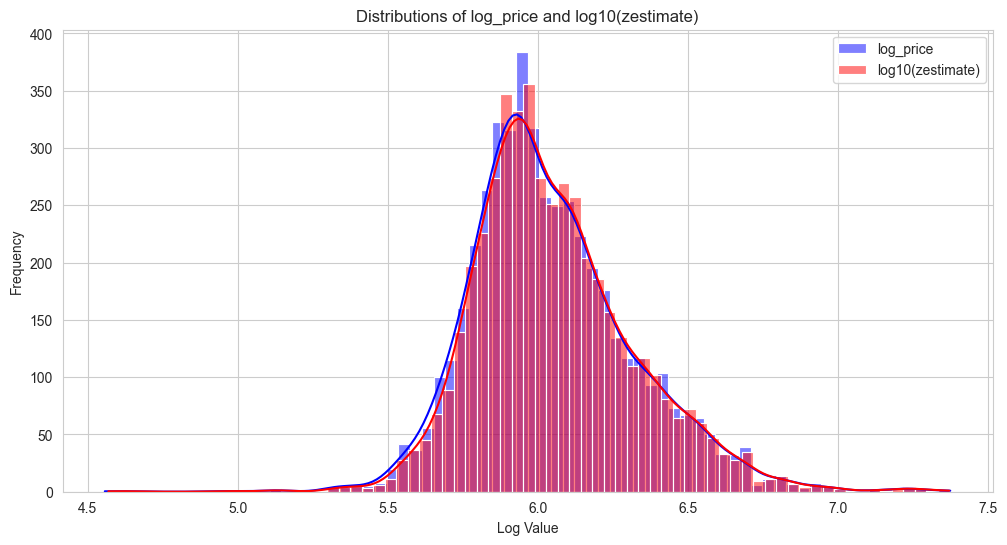

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(12, 6))
sns.histplot(df['log_price'], color='blue', label='log_price', kde=True)
sns.histplot(np.log10(df['zestimate']), color='red', label='log10(zestimate)', kde=True)
plt.legend()
plt.title('Distributions of log_price and log10(zestimate)')
plt.xlabel('Log Value')
plt.ylabel('Frequency')
plt.show()


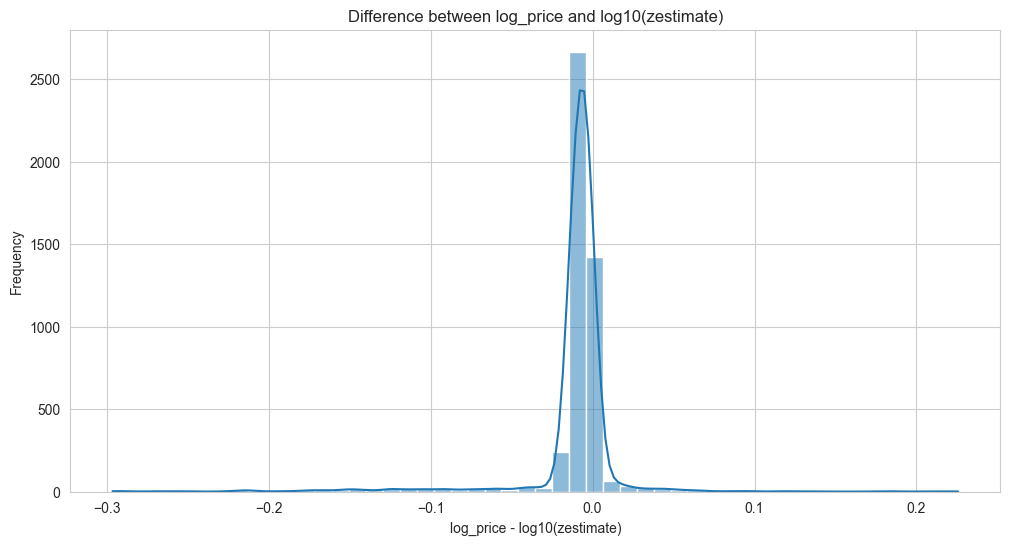

In [54]:
df['log_diff'] = df['log_price'] - np.log10(df['zestimate'])

plt.figure(figsize=(12, 6))
sns.histplot(df['log_diff'], bins=50, kde=True)
plt.title('Difference between log_price and log10(zestimate)')
plt.xlabel('log_price - log10(zestimate)')
plt.ylabel('Frequency')
plt.show()


In this case we have statistical significance but not practical significance. The reason for this is that the sample size is very large and it captures even the smallest differences:

$$s_D^2 = \frac{1}{n-1} \sum_{i=1}^n (D_i - \bar{D})^2$$

$$t = \frac{\bar{D}}{s_D / \sqrt{n}}$$

from the above formula we can see that when n is large the t value will be large even if the difference is small.




We can use another method called `effect size` which shows the practical significance of a difference. We can use Cohen's d for this purpose. Cohen's d is calculated as below:

$$d = \frac{\bar{x}_1 - \bar{x}_2}{s}$$

where $s = \sqrt{\frac{s_1^2 + s_2^2}{2}}$


In [55]:
s = np.sqrt(df["log_price"].std()**2 + np.log10(df["zestimate"]).std()**2 / 2)
cohen_d = (df['log_price'].mean() - np.log10(df['zestimate']).mean()) / s
cohen_d

-0.030828477386641125

We can see that the effect size is very small which means that the practical difference between zestimate and price is very small. 

In order to reduce the effect of large sample size, we took a smaller sample from our population and repeated the test. We can see that the p-value is still very small and it did not change and the effect size is still very small.  

In [56]:
SAMPLE_PORTION = 0.1

sample = df.sample(frac=SAMPLE_PORTION, random_state=42)

In [57]:
from scipy.stats import ttest_rel
import numpy as np

res = ttest_rel(sample['log_price'], np.log10(sample['zestimate']))
res

TtestResult(statistic=-7.091243575365157, pvalue=4.871078799286413e-12, df=473)

In [58]:
s = np.sqrt(sample["log_price"].std()**2 + np.log10(sample["zestimate"]).std()**2 / 2)
cohen_d = sample['log_diff'].mean() / s
cohen_d

-0.029826090389680895

We also repeat the process with the difference between price and zestimate itself(rather than the log of them) and we can see that the p-value is still very small and the effect size is still very small.

In [59]:
from scipy.stats import ttest_rel
import numpy as np

res = ttest_rel(sample['price'], sample['zestimate'])
res

TtestResult(statistic=-7.217583895966474, pvalue=2.1220583558294986e-12, df=473)

In [60]:
cohen_d = sample['price'].mean() / sample['price'].std()

The final method we used is the confidence interval. We use the 95% confidence interval to see if the difference between zestimate and price is significant. From the confidence interval we can see that although 0 doesn't lie in the interval, the distance between the lower bound and 0 is very small which means that the difference is not that significant.

In [61]:
import numpy as np
from scipy.stats import t

column1 = np.array(df['log_price'])
column2 = np.array(np.log10(df['zestimate']))

mean1, std1 = np.mean(column1), np.std(column1, ddof=1)
mean2, std2 = np.mean(column2), np.std(column2, ddof=1)

n1, n2 = len(column1), len(column2)

s = (column2 - column1).std()

alpha = 0.05
z_critical = t.ppf(1 - alpha / 2, n1 + n2 - 2) 
se_diff = s / np.sqrt(n1)
mean_diff = mean1 - mean2
lower, upper = mean_diff - z_critical * se_diff, mean_diff + z_critical * se_diff

print(lower, upper)

if lower <= 0 <= upper:
    print("The null hypothesis that the means are equal cannot be rejected.")
else:
    print("The null hypothesis that the means are equal can be rejected.")

-0.01111150192078154 -0.009470457290506596
The null hypothesis that the means are equal can be rejected.


We repeat this process for the difference between price and tax assessed value and again the null hypothesis is rejected and the difference is significant. This time the cohen_d is also high so we have both statistical and practical significance.

In [62]:
from scipy.stats import ttest_rel
import numpy as np

res = ttest_rel(df['log_price'], df['log_taxAssessedValue'])
res

TtestResult(statistic=70.88459552813123, pvalue=0.0, df=4734)

In [63]:
cohen_d = (df['log_price'].mean() - df['log_taxAssessedValue'].mean()) / df['log_price'].std()
cohen_d

1.333222370302646

From plots we can see we also have a practical difference between price and tax assessed value!

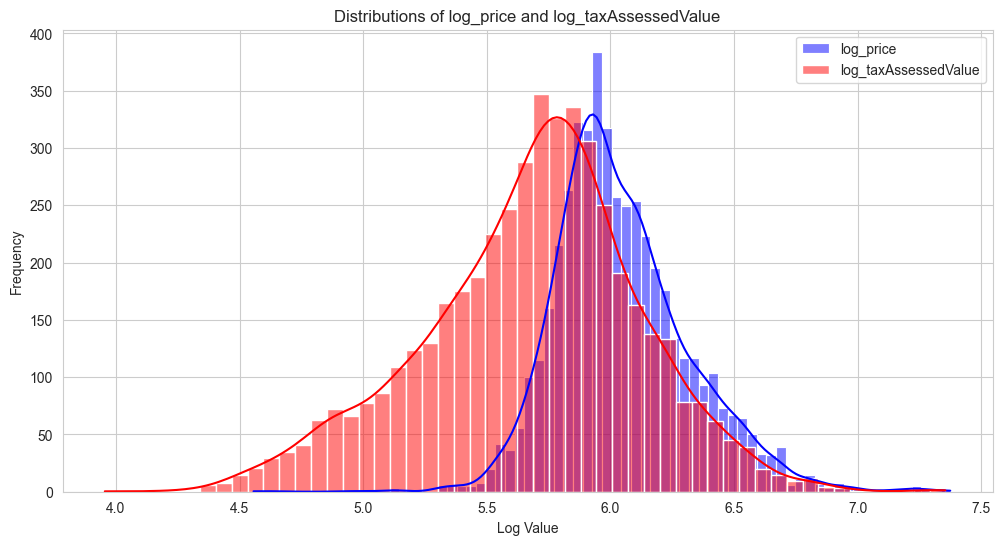

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(12, 6))
sns.histplot(df['log_price'], color='blue', label='log_price', kde=True)
sns.histplot(df['log_taxAssessedValue'], color='red', label='log_taxAssessedValue', kde=True)
plt.legend()
plt.title('Distributions of log_price and log_taxAssessedValue')
plt.xlabel('Log Value')
plt.ylabel('Frequency')
plt.show()


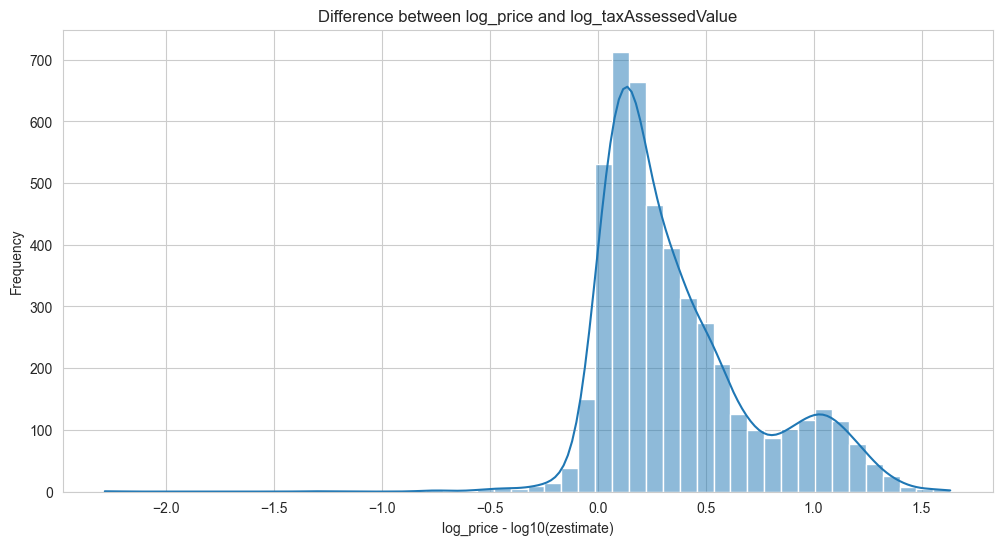

In [65]:
df['log_diff'] = df['log_price'] - df['log_taxAssessedValue']

plt.figure(figsize=(12, 6))
sns.histplot(df['log_diff'], bins=50, kde=True)
plt.title('Difference between log_price and log_taxAssessedValue')
plt.xlabel('log_price - log10(zestimate)')
plt.ylabel('Frequency')
plt.show()


### independant t-test

independant t-test is used to determine if the means of two independent samples are significantly different from each other. 

First we define some functions for this part:

* `perform_ttest_ind`: This function performs the independant t-test on two samples and checks whether we can reject the null hypothesis or not.

* `calculate_cohen_d`: This function calculates the effect size of the difference between two samples.

* `test_on_confidence_interval`: This function calculates the confidence interval of the difference between two samples and checks if 0 lies in the interval or not.

In [66]:
from scipy.stats import ttest_ind

def perform_ttest_ind(column1, column2):
    res = ttest_ind(column1, column2)
    print(res)
    if res.pvalue < 0.05:
        print("The null hypothesis that the means are equal can be rejected.")
    else:
        print("The null hypothesis that the means are equal cannot be rejected.")

def calculate_cohens_d(column1, column2):
    n1 = len(column1)
    n2 = len(column2)
    s_pooled = np.sqrt(((n1 - 1) * column1.var() + (n2 - 1) * column2.var()) / (n1 + n2 - 2))
    cohen_d = (column1.mean() - column2.mean()) / s_pooled
    print("cohen's d: ", cohen_d)
    
def test_on_confidence_interval(column1, column2, confidence_level=0.95):
    mean_with_pool = np.mean(column1)
    mean_without_pool = np.mean(column2)

    std_with_pool = np.std(column1, ddof=1)
    std_without_pool = np.std(column2, ddof=1)

    n1 = len(column1)
    n2 = len(column2)
    pooled_std = np.sqrt(((n1 - 1) * std_with_pool ** 2 + (n2 - 1) * std_without_pool ** 2) / (n1 + n2 - 2))

    SE = pooled_std * np.sqrt(1/n1 + 1/n2)

    t_critical = t.ppf((1 + confidence_level) / 2, df=n1 + n2 - 2)
    margin_of_error = t_critical * SE

    lower_bound = (mean_with_pool - mean_without_pool) - margin_of_error
    upper_bound = (mean_with_pool - mean_without_pool) + margin_of_error

    is_significant = lower_bound > 0 or upper_bound < 0

    print("confidence interval: ", (lower_bound, upper_bound))
    if is_significant:
        print("The null hypothesis that the means are equal can be rejected.")
    else:
        print("The null hypothesis that the means are equal cannot be rejected.")

Now in each scenario, we group the samples by a feature into two groups and check if the difference in another feature is significant between the two groups or not.

#### Having pool and lot area

Suprisingly, We can see that having pool doesn't have significant effect on the lot area. We can reject the null hypothesis when we are comparing the lot area itself but the effect size is small and also when we're comparing the log of lot area, the null hypothesis is not rejected.

In [67]:
lot_area_has_pool = np.array(df[df['hasPrivatePool'] == 1]['lotAreaValue'])
lot_area_has_not_pool = np.array(df[df['hasPrivatePool'] == 0]['lotAreaValue'])

perform_ttest_ind(lot_area_has_pool, lot_area_has_not_pool)
calculate_cohens_d(lot_area_has_pool, lot_area_has_not_pool)
test_on_confidence_interval(lot_area_has_pool, lot_area_has_not_pool)

TtestResult(statistic=-4.32864797542266, pvalue=1.531247729466232e-05, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  -0.2012230623811496
confidence interval:  (-2033.603394266182, -765.7588649328277)
The null hypothesis that the means are equal can be rejected.


In [68]:
log_lot_area_has_pool = np.array(df[df['hasPrivatePool'] == 1]['log_lotAreaValue'])
log_lot_area_has_not_pool = np.array(df[df['hasPrivatePool'] == 0]['log_lotAreaValue'])

perform_ttest_ind(log_lot_area_has_pool, log_lot_area_has_not_pool)
calculate_cohens_d(log_lot_area_has_pool, log_lot_area_has_not_pool)
test_on_confidence_interval(log_lot_area_has_pool, log_lot_area_has_not_pool)

TtestResult(statistic=-0.4363527609769507, pvalue=0.6626007100352009, df=4733.0)
The null hypothesis that the means are equal cannot be rejected.
cohen's d:  -0.02028440940501723
confidence interval:  (-0.05466400881540952, 0.03476029458423553)
The null hypothesis that the means are equal cannot be rejected.


#### Having pool and living area

We can see tha having pool has much more significant effect on the living area. We can reject the null hypothesis in both cases and the effect size is also higher than the previous section.

In [69]:
living_area_has_pool = np.array(df[df['hasPrivatePool'] == 1]['livingAreaValue'])
living_area_has_not_pool = np.array(df[df['hasPrivatePool'] == 0]['livingAreaValue'])

perform_ttest_ind(living_area_has_pool, living_area_has_not_pool)
calculate_cohens_d(living_area_has_pool, living_area_has_not_pool)
test_on_confidence_interval(living_area_has_pool, living_area_has_not_pool)

TtestResult(statistic=14.997666520968048, pvalue=1.0380761961763553e-49, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.6972734364161356
confidence interval:  (74.40807723087497, 96.78626309141171)
The null hypothesis that the means are equal can be rejected.


In [70]:
living_area_has_pool = np.array(df[df['hasPrivatePool'] == 1]['log_livingAreaValue'])
living_area_has_not_pool = np.array(df[df['hasPrivatePool'] == 0]['log_livingAreaValue'])

perform_ttest_ind(living_area_has_pool, living_area_has_not_pool)
calculate_cohens_d(living_area_has_pool, living_area_has_not_pool)
test_on_confidence_interval(living_area_has_pool, living_area_has_not_pool)

TtestResult(statistic=17.112989980928823, pvalue=9.49413562363495e-64, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.7955656245131577
confidence interval:  (0.1541751889757403, 0.19407020577096293)
The null hypothesis that the means are equal can be rejected.


#### Having pool and price

Having pool also has a significant effect on the price. We can reject the null hypothesis in both cases.

In [71]:
price_has_pool = np.array(df[df['hasPrivatePool'] == 1]['price'])
price_has_not_pool = np.array(df[df['hasPrivatePool'] == 0]['price'])

perform_ttest_ind(price_has_pool, price_has_not_pool)
calculate_cohens_d(price_has_pool, price_has_not_pool)
test_on_confidence_interval(price_has_pool, price_has_not_pool)

TtestResult(statistic=13.914381507112584, pvalue=3.632475637572258e-43, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.6469845440960713
confidence interval:  (772912.9951606089, 1026431.4417679427)
The null hypothesis that the means are equal can be rejected.


In [72]:
log_price_has_pool = np.array(df[df['hasPrivatePool'] == 1]['log_price'])
log_price_has_not_pool = np.array(df[df['hasPrivatePool'] == 0]['log_price'])

perform_ttest_ind(log_price_has_pool, log_price_has_not_pool)
calculate_cohens_d(log_price_has_pool, log_price_has_not_pool)
test_on_confidence_interval(log_price_has_pool, log_price_has_not_pool)

TtestResult(statistic=16.705926796136175, pvalue=6.401203726784372e-61, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.7766511941775833
confidence interval:  (0.18229795304291002, 0.2307723690488222)
The null hypothesis that the means are equal can be rejected.


#### Having fire place and price

Having fire place also has a significant effect on the price. We can reject the null hypothesis in both cases.

In [73]:
price_has_fireplace = np.array(df[df['hasFireplace'] == 1]['price'])
price_has_not_fireplace = np.array(df[df['hasFireplace'] == 0]['price'])

perform_ttest_ind(price_has_fireplace, price_has_not_fireplace)
calculate_cohens_d(price_has_fireplace, price_has_not_fireplace)
test_on_confidence_interval(price_has_fireplace, price_has_not_fireplace)

TtestResult(statistic=16.486900247135157, pvalue=2.011397665972827e-59, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.4830110093472734
confidence interval:  (587263.551294403, 745775.9238621223)
The null hypothesis that the means are equal can be rejected.


In [74]:
log_price_has_fireplace = np.array(df[df['hasFireplace'] == 1]['log_price'])
log_price_has_not_fireplace = np.array(df[df['hasFireplace'] == 0]['log_price'])

perform_ttest_ind(log_price_has_fireplace, log_price_has_not_fireplace)
calculate_cohens_d(log_price_has_fireplace, log_price_has_not_fireplace)
test_on_confidence_interval(log_price_has_fireplace, log_price_has_not_fireplace)

TtestResult(statistic=23.651002520709174, pvalue=5.545098347081356e-117, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.6929032172978187
confidence interval:  (0.1644567209190994, 0.1941850486961863)
The null hypothesis that the means are equal can be rejected.


### Having cooling and price

Although the test shows that having cooling has a significant effect on the price, the effect size smaller than the previous tests and the confidence interval shows that the interval is closer to 0 so the difference is less significant than the previous tests.

In [75]:
price_has_cooling = np.array(df[df['hasCooling'] == 1]['price'])
price_has_not_cooling = np.array(df[df['hasCooling'] == 0]['price'])

perform_ttest_ind(price_has_cooling, price_has_not_cooling)
calculate_cohens_d(price_has_cooling, price_has_not_cooling)
test_on_confidence_interval(price_has_cooling, price_has_not_cooling)

TtestResult(statistic=8.366780219893172, pvalue=7.707435574215394e-17, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.30748475174325923
confidence interval:  (331653.71818038815, 534639.5617423017)
The null hypothesis that the means are equal can be rejected.


In [76]:
log_price_has_cooling = np.array(df[df['hasCooling'] == 1]['log_price'])
log_price_has_not_cooling = np.array(df[df['hasCooling'] == 0]['log_price'])

perform_ttest_ind(log_price_has_cooling, log_price_has_not_cooling)
calculate_cohens_d(log_price_has_cooling, log_price_has_not_cooling)
test_on_confidence_interval(log_price_has_cooling, log_price_has_not_cooling)

TtestResult(statistic=11.628992323340002, pvalue=7.681852290329135e-31, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.42738942653162215
confidence interval:  (0.09588394739898509, 0.13476828928470364)
The null hypothesis that the means are equal can be rejected.


#### Having Spa and price

For Spa the significance is even less than the cooling. The effect size is smaller and the confidence interval is closer to 0 but the test still shows that the difference is statistically significant.

In [77]:
price_has_spa = np.array(df[df['hasSpa'] == 1]['price'])
price_has_not_spa = np.array(df[df['hasSpa'] == 0]['price'])

perform_ttest_ind(price_has_spa, price_has_not_spa)
calculate_cohens_d(price_has_spa, price_has_not_spa)
test_on_confidence_interval(price_has_spa, price_has_not_spa)

TtestResult(statistic=6.972198024117488, pvalue=3.5500244082267708e-12, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.31761075808654754
confidence interval:  (322248.16131388844, 574359.1123302181)
The null hypothesis that the means are equal can be rejected.


In [78]:
log_price_has_spa = np.array(df[df['hasSpa'] == 1]['log_price'])
log_price_has_not_spa = np.array(df[df['hasSpa'] == 0]['log_price'])

perform_ttest_ind(log_price_has_spa, log_price_has_not_spa)
calculate_cohens_d(log_price_has_spa, log_price_has_not_spa)
test_on_confidence_interval(log_price_has_spa, log_price_has_not_spa)

TtestResult(statistic=2.7937113542091367, pvalue=0.005231650530578872, df=4733.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.12724956363065973
confidence interval:  (0.010377080309161138, 0.0592075711340128)
The null hypothesis that the means are equal can be rejected.


### single-family vs condo

Two most common home types in the data set are single-family and condo so we decided to compare the price of these two types. The test shows that the difference is significant and the effect size is also high.

In [79]:
price_single_family = np.array(df[df['homeType'] == 'SINGLE_FAMILY']['price'])
price_condo = np.array(df[df['homeType'] == 'CONDO']['price'])

perform_ttest_ind(price_single_family, price_condo)
calculate_cohens_d(price_single_family, price_condo)
test_on_confidence_interval(price_single_family, price_condo)

TtestResult(statistic=14.042002873566132, pvalue=9.178574481924477e-44, df=4021.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.5334627965550254
confidence interval:  (672799.4188576543, 891160.5950701958)
The null hypothesis that the means are equal can be rejected.


In [80]:
log_price_single_family = np.array(df[df['homeType'] == 'SINGLE_FAMILY']['log_price'])
log_price_condo = np.array(df[df['homeType'] == 'CONDO']['log_price'])

perform_ttest_ind(log_price_single_family, log_price_condo)
calculate_cohens_d(log_price_single_family, log_price_condo)
test_on_confidence_interval(log_price_single_family, log_price_condo)

TtestResult(statistic=24.74033903393239, pvalue=6.609476585212971e-126, df=4021.0)
The null hypothesis that the means are equal can be rejected.
cohen's d:  0.9399431029614862
confidence interval:  (0.2235647485067133, 0.2620471830653458)
The null hypothesis that the means are equal can be rejected.


### Chai Square test for home types

Chai Square test is used to determine if there is a significant relationship between two categorical variables. We use this test to determine if there is a significant relationship between the home types and another categorical(or binary) feature:
* Null Hypothesis (H0): There is no significant relationship between the two categorical variables.
* Alternative Hypothesis (Ha): There is a significant relationship between the two categorical variables.

Like other tests it calculates a score(here it's called chai2) and using that score, it calculates the p-value and the decides if the null hypothesis should be rejected or not.

chai2 is calculated as below:

$$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$

where $O_i$ is the observed frequency and $E_i$ is the expected frequency.

In [81]:
df["homeType"].value_counts()

homeType
SINGLE_FAMILY    3133
CONDO             890
MULTI_FAMILY      396
TOWNHOUSE         293
APARTMENT          11
MANUFACTURED       10
LOT                 2
Name: count, dtype: int64

We only include single-family, condo, multi-family and townhouse for the home types as the other types have very few samples.

We also calculate a coefficient called Cranmer's V which is used to determine the strength of the relationship between two categorical variables and we use it to make sure that the relationship is significant. It's calculated as below:

$$V = \sqrt{\frac{\chi^2}{n \times (min(r-1, c-1))}}$$

where r and c are the number of rows and columns in the contingency table.

In [82]:
from scipy.stats import chi2_contingency

homeTypes = ["SINGLE_FAMILY", "CONDO", "TOWNHOUSE", "MULTI_FAMILY"]
df_filtered_hometypes = df[df["homeType"].isin(homeTypes)]

def perfrom_chi2_test(column1, column2):
    contingency_table = pd.crosstab(column1, column2)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("chi2: ", chi2)
    print("p: ", p)
    if p < 0.05:
        print("The null hypothesis that the variables are independent can be rejected.")
    else:
        print("The null hypothesis that the variables are independent cannot be rejected.")
    print("crammers_v: ", cramers_v(contingency_table, chi2))
    display(contingency_table)
    
def cramers_v(confusion_matrix, chi2_statistic):
    chi2 = chi2_statistic
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

We perform this test with all *having* features and we see that all of them are related to the home type but some of them are more significant than the others. For example `hasView` has a very high chai2 score and a very high Cranmer's V which means that it has a very strong relationship with the home type.

In [83]:
perfrom_chi2_test(df_filtered_hometypes["homeType"], df_filtered_hometypes["hasPrivatePool"])

chi2:  249.5129117256268
p:  8.340199418475354e-54
The null hypothesis that the variables are independent can be rejected.
crammers_v:  0.22875085839539938


hasPrivatePool,0,1
homeType,,
CONDO,882,8
MULTI_FAMILY,395,1
SINGLE_FAMILY,2627,506
TOWNHOUSE,288,5


In [84]:
perfrom_chi2_test(df_filtered_hometypes["homeType"], df_filtered_hometypes["hasSpa"])

chi2:  203.19906911393429
p:  8.588264759258342e-44
The null hypothesis that the variables are independent can be rejected.
crammers_v:  0.20614546910265164


hasSpa,0,1
homeType,,
CONDO,744,146
MULTI_FAMILY,395,1
SINGLE_FAMILY,2832,301
TOWNHOUSE,199,94


In [85]:
perfrom_chi2_test(df_filtered_hometypes["homeType"], df_filtered_hometypes["hasView"])

chi2:  760.6599785853615
p:  1.4719379936497322e-164
The null hypothesis that the variables are independent can be rejected.
crammers_v:  0.401033311882929


hasView,0,1
homeType,,
CONDO,74,816
MULTI_FAMILY,248,148
SINGLE_FAMILY,381,2752
TOWNHOUSE,18,275


In [86]:
perfrom_chi2_test(df_filtered_hometypes["homeType"], df_filtered_hometypes["hasCooling"])

chi2:  470.7388102266385
p:  1.0462027885203313e-101
The null hypothesis that the variables are independent can be rejected.
crammers_v:  0.31509743315106864


hasCooling,0,1
homeType,,
CONDO,50,840
MULTI_FAMILY,216,180
SINGLE_FAMILY,638,2495
TOWNHOUSE,10,283


In [87]:
perfrom_chi2_test(df_filtered_hometypes["homeType"], df_filtered_hometypes["hasHeating"])

chi2:  230.58213396935517
p:  1.035023122844367e-49
The null hypothesis that the variables are independent can be rejected.
crammers_v:  0.21979202623019303


hasHeating,0,1
homeType,,
CONDO,33,857
MULTI_FAMILY,125,271
SINGLE_FAMILY,369,2764
TOWNHOUSE,10,283


In [88]:
perfrom_chi2_test(df_filtered_hometypes["homeType"], df_filtered_hometypes["hasFireplace"])

chi2:  422.37333063401826
p:  3.152169076778268e-91
The null hypothesis that the variables are independent can be rejected.
crammers_v:  0.2983620155460143


hasFireplace,0,1
homeType,,
CONDO,465,425
MULTI_FAMILY,348,48
SINGLE_FAMILY,1143,1990
TOWNHOUSE,95,198


#### Phi Coefficient (Mean Square Contingency Coefficient)

For the final part in statistical tests, we use the Phi Coefficient to determine the strength of the relationship between two binary variables. It's calculated as below:

$$\phi = \sqrt{\frac{\chi^2}{n}}$$

where $\chi^2$ is the chai2 score and n is the total number of samples.

In [89]:
def calculate_phi_coeff(column1, column2):
    contingency_table = pd.crosstab(column1, column2)
    a = contingency_table.loc[0, 0]  
    b = contingency_table.loc[0, 1]  
    c = contingency_table.loc[1, 0]  
    d = contingency_table.loc[1, 1]  

    phi = (a * d - b * c) / np.sqrt((a + b) * (c + d) * (a + c) * (b + d))
    return phi

We use this coefficient to determine the strength of the relationship between all *having* features and we visualize the results in a heatmap:

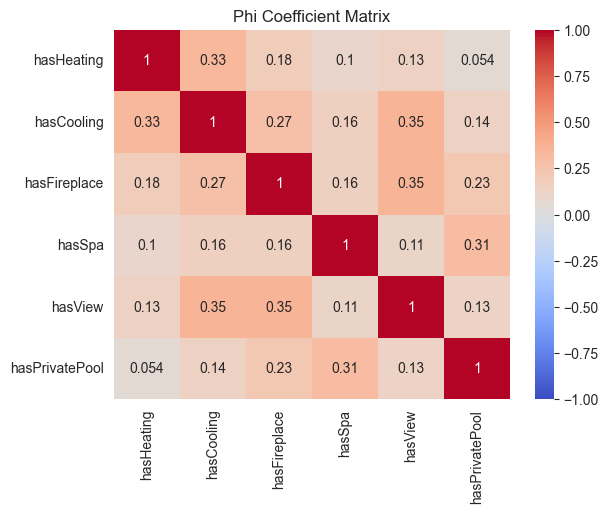

In [90]:
features = ["hasHeating", "hasCooling", "hasFireplace", "hasSpa", "hasView", "hasPrivatePool"]

phi_coeff_matrix = pd.DataFrame(index=features, columns=features)

for feature1 in features:
    for feature2 in features:
        coeff = calculate_phi_coeff(df_filtered_hometypes[feature1], df_filtered_hometypes[feature2])
        phi_coeff_matrix.loc[feature1, feature2] = coeff

phi_coeff_matrix = phi_coeff_matrix.astype(float)

sns.heatmap(phi_coeff_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Phi Coefficient Matrix')
plt.show()

From the heatmap we can see that (`hasCooling`, `hasView`) and (`hasFireplace`, `hasView`) have the highest relationship with each other and the home type. (`hasSpa`, `hasPrivatePool`) and (`hasCooling`, `hasHeating`) also have a high relationship with each other which is something that we can expect.